In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\Marketing.csv')
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [3]:
df.nunique()

id               308
c_date            28
campaign_name     11
category           4
campaign_id       11
impressions      301
mark_spent       308
clicks           274
leads            176
orders            88
revenue          265
dtype: int64

# KPIs

**Return on marketing investment (ROMI)**

In [4]:
Investment = sum(df['mark_spent'])
Revenue = sum(df['revenue'])

ROMI = (Revenue/Investment) * 100
ROMI = round(ROMI, 4)
print(f"Investment : ${Investment}")
print(f"Revenue : ${Revenue}")
print(f"Returns On Marketing Investment : {ROMI}%")

Investment : $30590879.819999997
Revenue : $42889366.0
Returns On Marketing Investment : 140.2031%


**Cost per click (CPC)**

In [5]:
cpc = round(sum(df['mark_spent'])/sum(df['clicks']),3)
print(f"Cost per click is ${cpc}")

Cost per click is $10.197


**Cost per lead (CPL)**

In [6]:
cpl = round(sum(df['mark_spent'])/sum(df['leads']),3)
print(f"Cost per lead is ${cpl}")

Cost per lead is $466.474


**Customer acquisition cost (CAC)**

In [7]:
cac = round(sum(df['mark_spent'])/sum(df['orders']),3)
print(f"Cost acquisition cost is ${cac}")

Cost acquisition cost is $3803.417


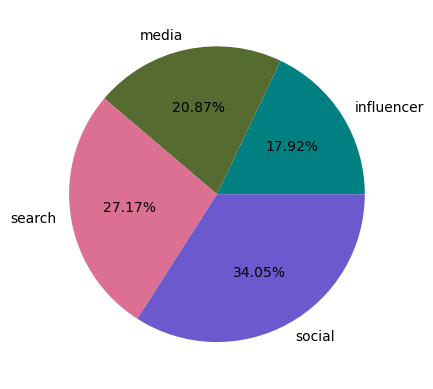

In [8]:
cost_per_category = df.groupby("category").apply(lambda x: x["mark_spent"].sum() / x["orders"].sum())
color = ['teal', 'darkolivegreen', 'palevioletred', 'slateblue']
plt.pie(x=cost_per_category.values, labels = cost_per_category.index, autopct="%.2f%%", colors=color)
plt.show()

**Average order value (AOV)**

In [9]:
aov = sum(df['orders'])/len(df['orders'])
print(f"Average Order Value is {int(aov)}")

Average Order Value is 26


**Conversion Rate 1 (Click Conversion Rate)**

In [10]:
cr1 = (df["clicks"].sum() / df["impressions"].sum()) * 100
print("Overall Conversion Rate :", cr1)

Overall Conversion Rate : 0.19014238511802986


In [11]:
import datetime
df['c_date'] = pd.to_datetime(df["c_date"])
df['c_day'] = df['c_date'].dt.day

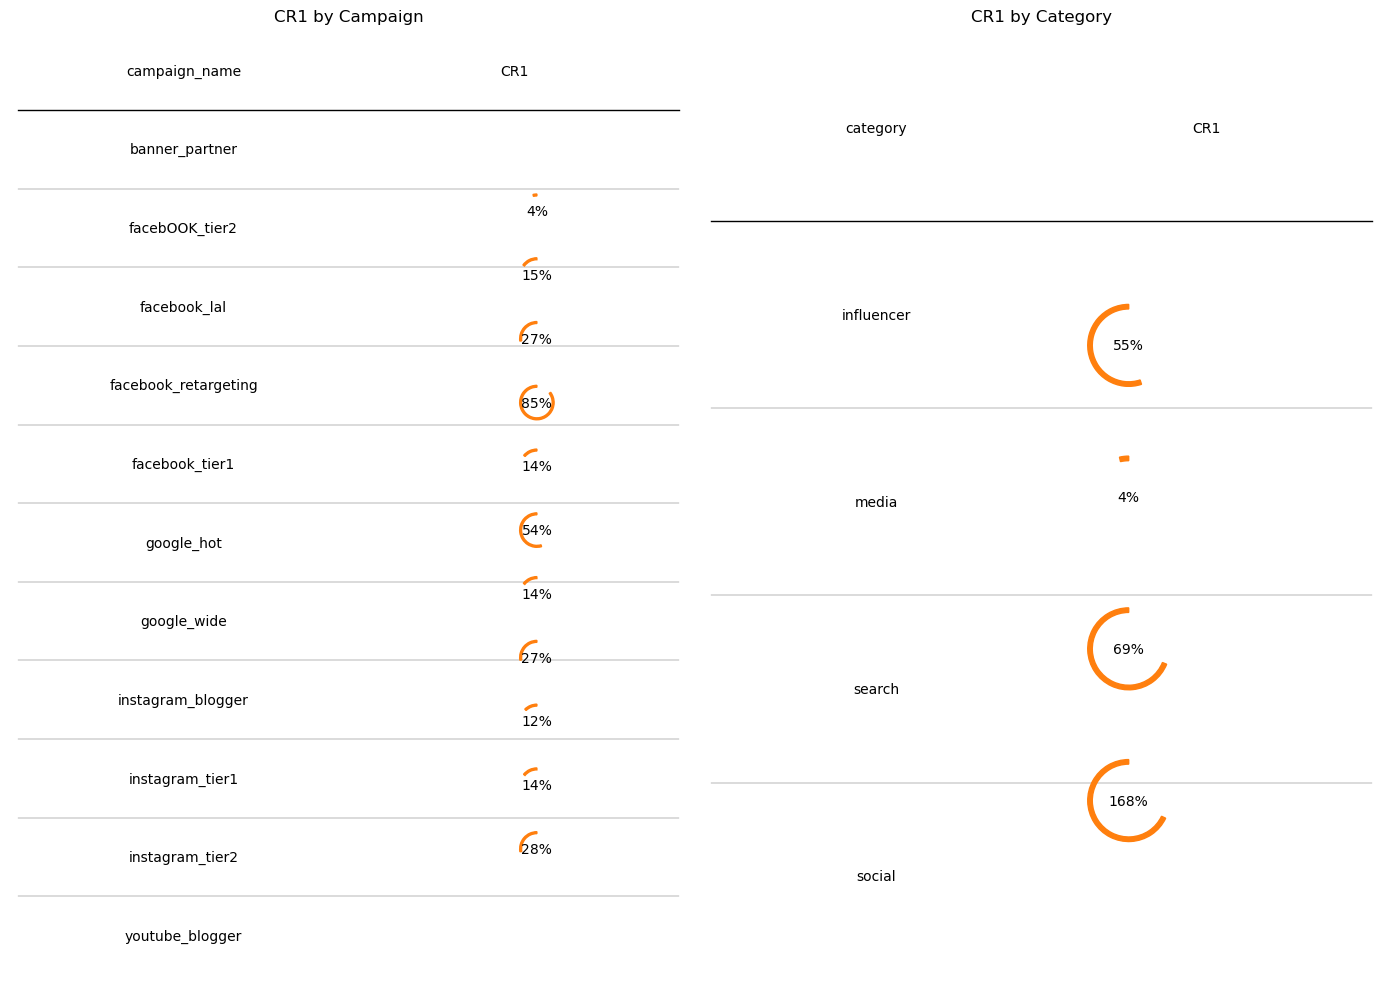

In [12]:
df["CR1"] = df["clicks"] / df["impressions"]
cr_table1 = df.groupby('campaign_name')[["CR1"]].sum()
cr_table2 = df.groupby('category')[["CR1"]].sum()

from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut
 
fig, axes = plt.subplots(1,2, figsize=(14,10))

# Table 1: by campaign
Table(cr_table1, 
            ax=axes[0],
            textprops={"ha": "center"},
            column_definitions=[ColumnDefinition("CR1", title='CR1',
                                                 plot_fn=progress_donut,
                                                 plot_kw={"is_pct": True,
                                                          "formatter": "{:.0%}"})])
axes[0].set_title("CR1 by Campaign")

# Table 2: by Category
Table(cr_table2, 
            ax=axes[1],
            textprops={"ha": "center"},
            column_definitions=[ColumnDefinition("CR1", title='CR1',
                                                 plot_fn=progress_donut,
                                                 plot_kw={"is_pct": True,
                                                          "formatter": "{:.0%}"})])
axes[1].set_title("CR1 by Category")

plt.tight_layout()
plt.show()

**Conversion Rate 2 (Lead/Order Conversion Rate)**

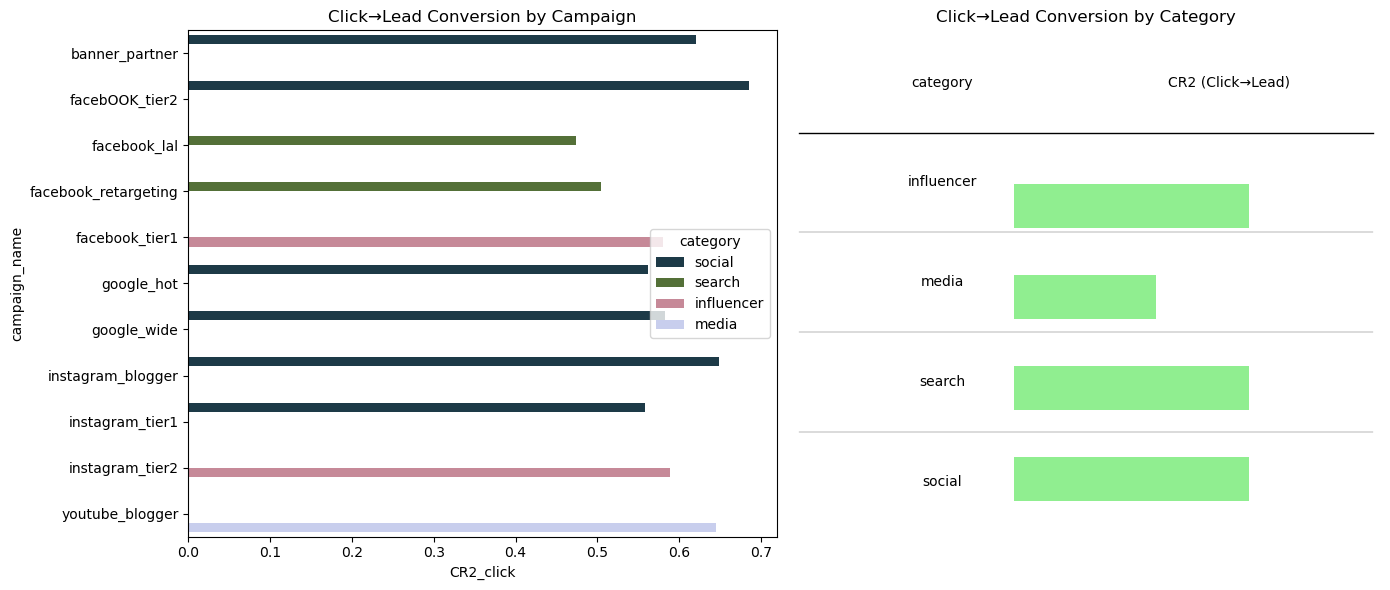

In [13]:
df["CR2_click"] = df["leads"] / df["clicks"]
cr2_click_table1 = df.groupby('campaign_name')[["CR2_click"]].sum()
cr2_click_table2 = df.groupby('category')[["CR2_click"]].sum()


from plottable.plots import bar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='CR2_click', y='campaign_name', orient='h', ax=axes[0], data=cr2_click_table1.reset_index(), hue=df['category'], palette='cubehelix')
axes[0].set_title("Click→Lead Conversion by Campaign")


Table(
    cr2_click_table2,
    ax=axes[1],
    textprops={"ha": "center", "color": "black"},
    column_definitions=[
        ColumnDefinition(
            "CR2_click",
            title="CR2 (Click→Lead)",
            plot_fn=bar,
            formatter="{:.2f}", 
            plot_kw={"color": "lightgreen"}
        )
    ]
)
axes[1].set_title("Click→Lead Conversion by Category")

plt.tight_layout()
plt.show()

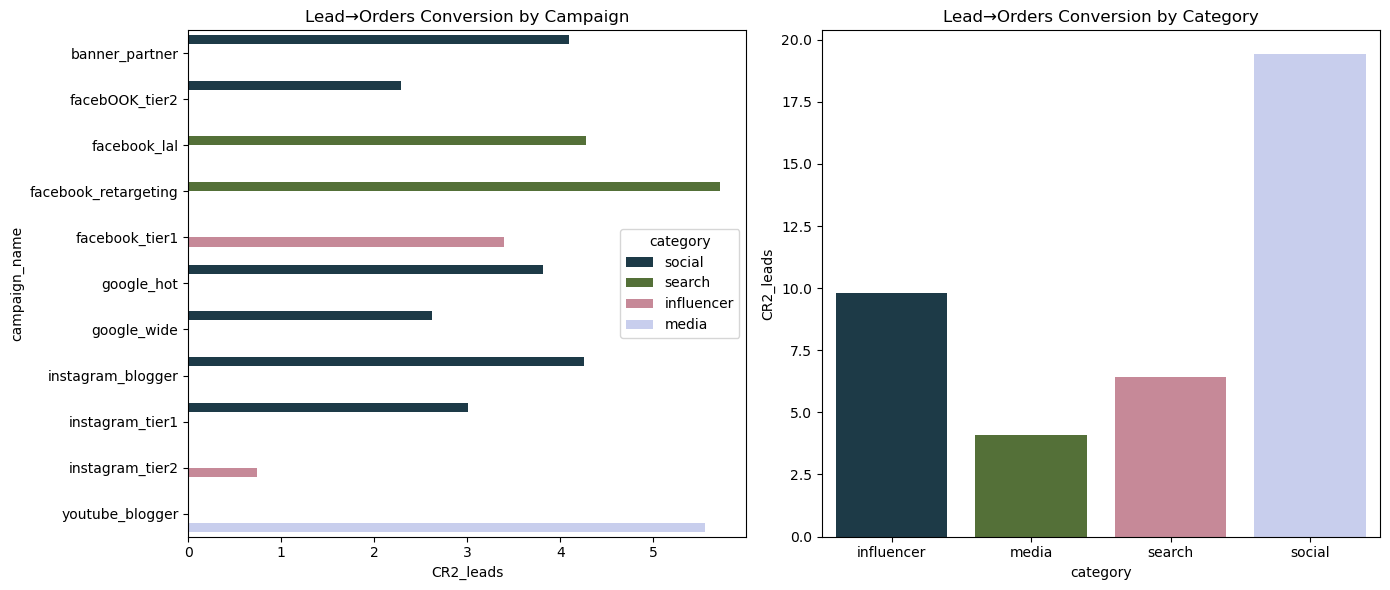

In [14]:
df["CR2_leads"] = df["orders"] / df["leads"]
cr2_lead_table1 = df.groupby('campaign_name')[["CR2_leads"]].sum()
cr2_lead_table2 = df.groupby('category')[["CR2_leads"]].sum()


from plottable.plots import bar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='CR2_leads', y='campaign_name', orient='h', ax=axes[0], data=cr2_lead_table1.reset_index(), hue=df['category'], palette='cubehelix')
axes[0].set_title("Lead→Orders Conversion by Campaign")

sns.barplot(x='category', y='CR2_leads', ax=axes[1], data=cr2_lead_table2.reset_index(), palette='cubehelix')
axes[1].set_title("Lead→Orders Conversion by Category")

plt.tight_layout()
plt.show()

# ROMI by campaigns

In [15]:
df['romi'] = (df['revenue']/df['mark_spent']) * 100

<Axes: xlabel='romi', ylabel='campaign_name'>

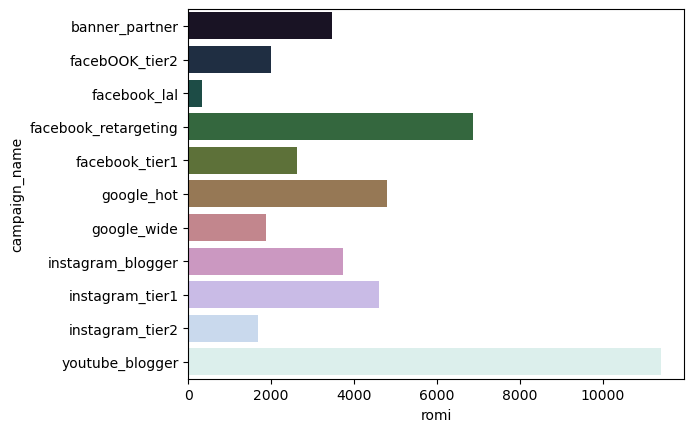

In [16]:
romi_by_camp = df.groupby('campaign_name')['romi'].sum().reset_index()
sns.barplot(y=romi_by_camp['campaign_name'], x=romi_by_camp['romi'],palette='cubehelix')

# Performance of the campaign depending on the date

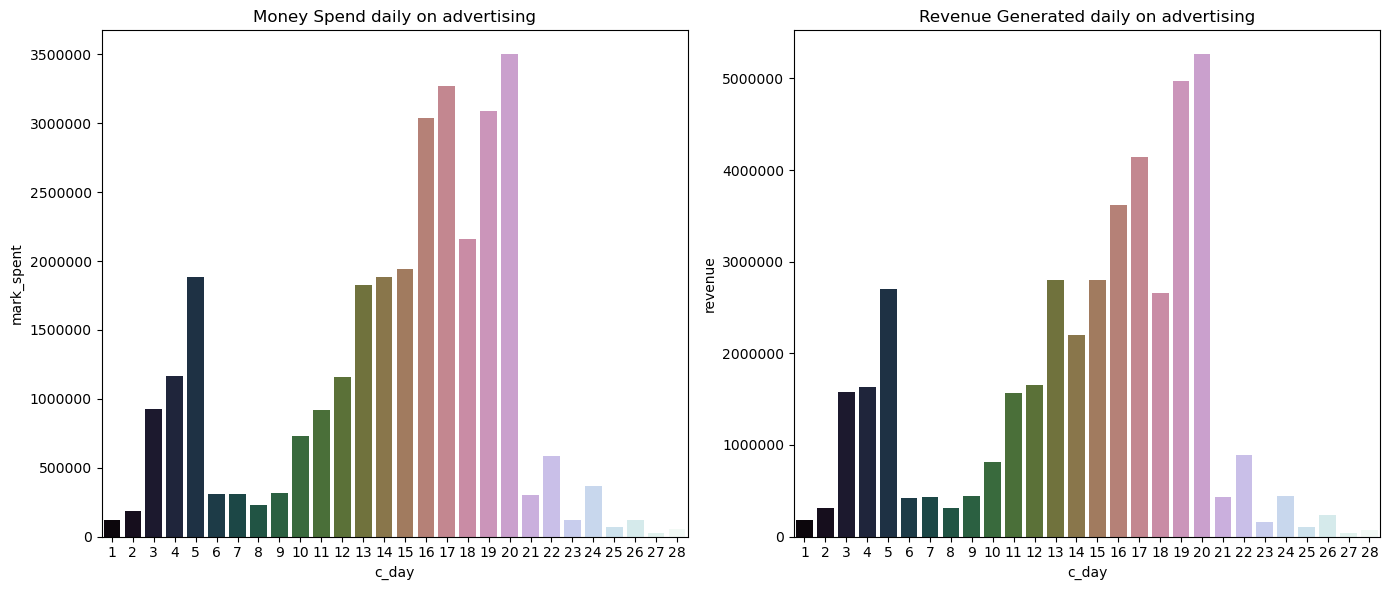

In [17]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
daily_spent = df.groupby('c_day')['mark_spent'].sum().reset_index()
sns.barplot(x='c_day', y='mark_spent', data=daily_spent, palette='cubehelix')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Money Spend daily on advertising")

plt.subplot(1,2,2)
daily_revenue = df.groupby('c_day')['revenue'].sum().reset_index()
sns.barplot(x='c_day', y='revenue', data=daily_revenue, palette='cubehelix')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Revenue Generated daily on advertising")

plt.tight_layout()
plt.show()

In [18]:
summarize = daily_spent.merge(daily_revenue, how='right')
summarize['profit'] = np.where(summarize['revenue'] - summarize['mark_spent'] < 1, 0, 
                               summarize['revenue'] - summarize['mark_spent'])

# Revenue Based on Conversion Rate

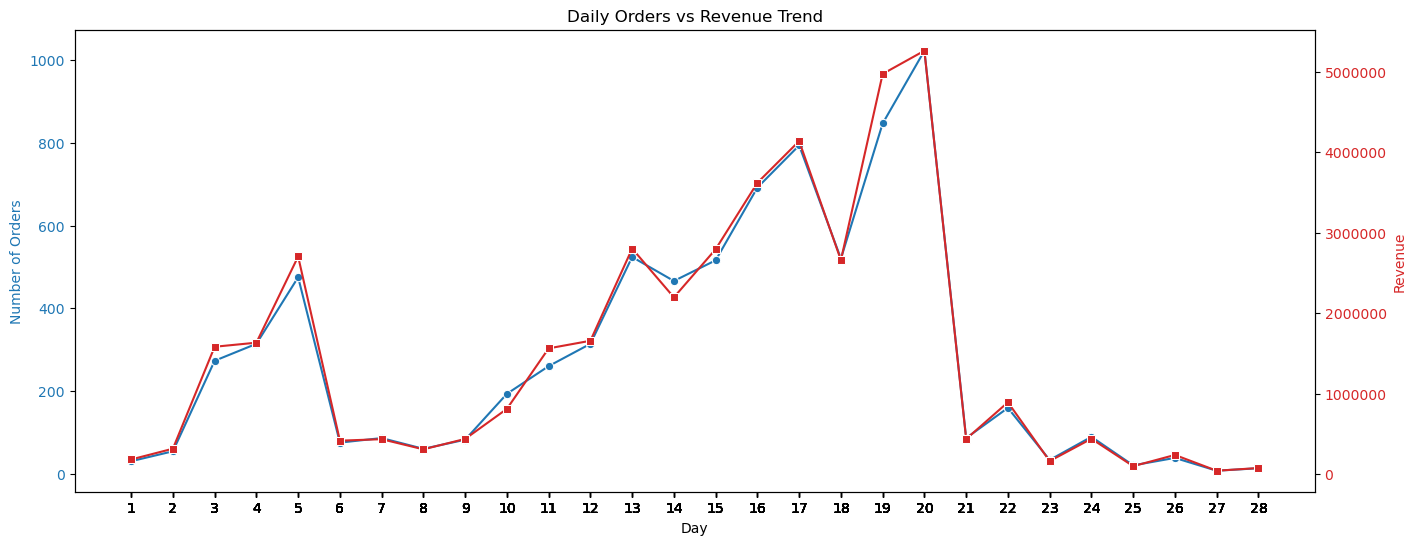

In [19]:

daily_orders = df.groupby('c_day')['orders'].sum()
daily_revenue = df.groupby('c_day')['revenue'].sum()

fig, ax1 = plt.subplots(figsize=(16,6))

color = 'tab:blue'
ax1.set_xlabel("Day")
ax1.set_ylabel("Number of Orders", color=color)
sns.lineplot(x=daily_orders.index, y=daily_orders.values, marker='o', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')

# Second axis for revenue
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Revenue", color=color)
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values, marker='s', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(df['c_day'])
plt.title("Daily Orders vs Revenue Trend")
plt.show()

1. **Orders and revenue move together** 📈

   * Notice how whenever orders spike (Day 3–5, 15–20), revenue also spikes almost in the same pattern.
   * This suggests revenue is strongly correlated with order volume (which is expected in most e-commerce/ads scenarios).

2. **Day 20 peak** 🎯

   * Both orders and revenue reached their **maximum** on Day 20.
   * This could mean a **campaign push, discount, or seasonal promotion**.

3. **Sharp drop after Day 20** ⬇️

   * Orders and revenue fall dramatically after the peak.
   * Could indicate the **end of a promotion**, **budget exhaustion**, or **ad fatigue**.

4. **Low but steady activity after Day 22**

   * Revenue and orders stabilize at a much lower level.
   * This baseline could represent your “organic” or non-promoted activity.

---
### Business Insight:

👉 This graph tells you that **campaigns have a huge impact**:

* We get massive spikes in both orders & revenue when campaigns are active.

So, to keep revenue high, the business must:
* Plan **consistent campaigns** 
* Analyze whether the **extra revenue during campaigns is profitable** after deducting ad spend.

# Lets Analyze how Day 20th Orders and Revenue was at peak

In [20]:
crosstab_analyse = pd.crosstab(index=df['campaign_name'], columns=df['c_day'], values=df['leads'], aggfunc='sum')
crosstab_analyse

c_day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
campaign_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
banner_partner,3,92,68,336,796,84,142,84,84,302,482,336,734,504,1061,416,756,840,924,1678,67,168,42,84,17,22,9,18
facebOOK_tier2,48,10,226,143,330,108,66,66,96,132,304,325,655,396,694,923,594,1313,726,853,113,132,37,66,13,33,13,13
facebook_lal,14,7,72,71,120,24,6,24,24,88,5,33,128,142,4,292,216,128,264,113,24,48,12,38,5,0,2,5
facebook_retargeting,3,0,18,4,30,6,6,10,6,22,27,34,19,10,28,48,54,28,7,116,3,12,3,6,3,3,0,0
facebook_tier1,13,48,115,192,143,76,45,36,68,96,144,192,397,110,247,384,652,61,71,88,66,96,28,93,15,39,9,11
google_hot,9,18,84,55,151,13,18,20,5,57,54,72,100,90,126,144,162,162,14,359,18,65,9,18,1,2,2,5
google_wide,24,39,144,234,139,48,48,48,48,154,144,192,378,498,336,666,442,480,281,732,48,39,24,52,19,11,5,1
instagram_blogger,49,19,342,267,51,20,93,60,99,187,227,412,50,354,122,833,795,1032,694,822,89,236,31,60,12,34,6,12
instagram_tier1,27,54,166,238,526,14,100,1,19,186,1,115,219,604,378,432,606,599,1082,1003,60,108,1,42,6,27,6,12


**On the 20th day, the majority of revenue came from Banner Postings, YouTube, and Instagram.**

* **Total Leads:** 8,082
* **Leads from Top 3 Campaigns:** 3,996
* **Share of Leads from Top 3:** 50%
* **Share of Revenue from Top 3:** 48%

In [21]:
crosstab_analyse1 = pd.crosstab(index=df['category'], columns=df['c_day'], values=df['leads'], aggfunc='sum')
crosstab_analyse1

c_day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,
influencer,98,104,797,712,782,153,175,139,189,267,701,790,840,894,752,1553,1541,1176,2360,1916,179,416,76,125,34,116,21,33
media,3,92,68,336,796,84,142,84,84,302,482,336,734,504,1061,416,756,840,924,1678,67,168,42,84,17,22,9,18
search,33,57,228,289,290,61,66,68,53,211,198,264,478,588,462,810,604,642,295,1091,66,104,33,70,20,13,7,6
social,199,133,1189,1056,1914,330,422,239,315,919,595,1107,1928,2197,2267,2895,3096,3149,2335,3397,368,520,132,367,62,175,33,45


# When buyers are more active?

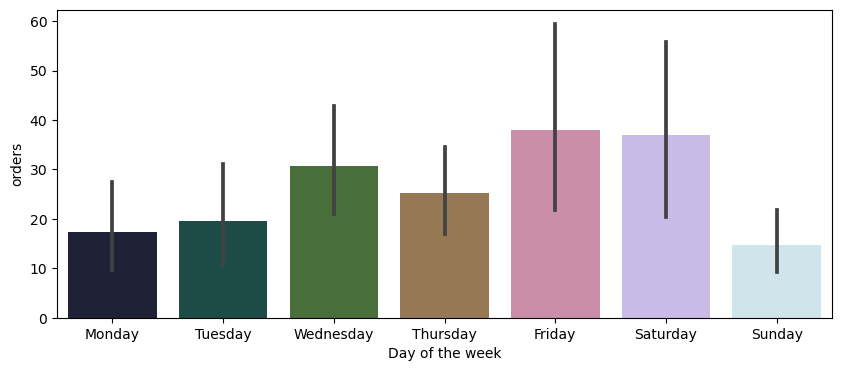

In [22]:
df['day_of_week'] = df["c_date"].dt.weekday
df['dayname_of_week'] = df["c_date"].dt.day_name()

plt.figure(figsize=(10,4))
sns.barplot(x=df['dayname_of_week'], y=df['orders'], palette='cubehelix')
plt.xlabel("Day of the week")
plt.show()

# What is the average revenue on weekdays and weekends?

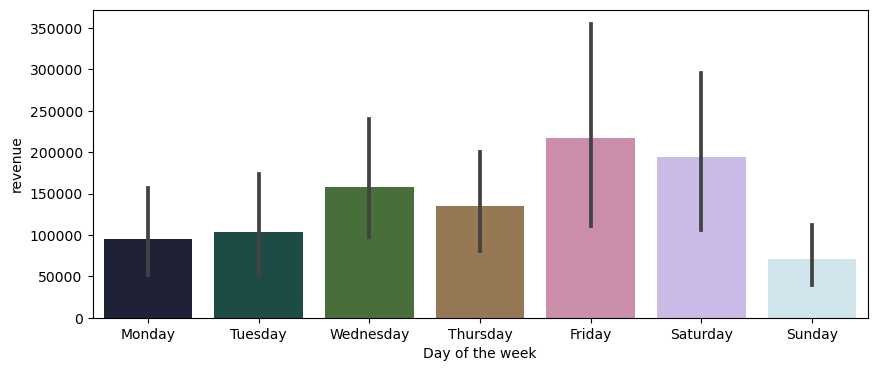

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="dayname_of_week", y=df["revenue"], estimator="mean", palette='cubehelix')
plt.xlabel("Day of the week")
plt.show()

# Which types of campaigns work best - social, banner, influencer, or a search?

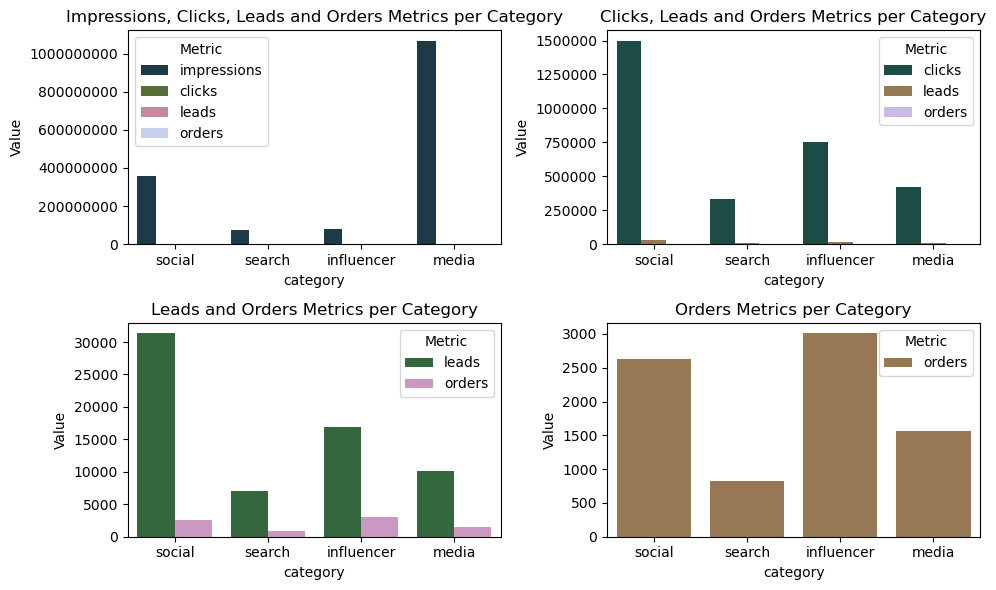

In [24]:
metrics1 = ["impressions", "clicks", "leads", "orders"]
metrics2 = ["clicks", "leads", "orders"]
metrics3 = ["leads", "orders"]
metrics4 = ["orders"]
df_melt1 = df.melt(id_vars="category", value_vars=metrics1, var_name="Metric", value_name="Value")
df_melt2 = df.melt(id_vars="category", value_vars=metrics2, var_name="Metric", value_name="Value")
df_melt3 = df.melt(id_vars="category", value_vars=metrics3, var_name="Metric", value_name="Value")
df_melt4 = df.melt(id_vars="category", value_vars=metrics4, var_name="Metric", value_name="Value")

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(data=df_melt1, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Impressions, Clicks, Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2,2,2)
sns.barplot(data=df_melt2, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Clicks, Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(2,2,3)
sns.barplot(data=df_melt3, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(2,2,4)
sns.barplot(data=df_melt4, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()